In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import re

In [33]:
model_cmp = './result/instances/stats/cmp-neuro-diffsizes-optimal.csv'
cols = ['Problem', 'Dimension', 'Method', 'Successes',
       'Best', 'Average', 'Trials_Min','Trials_Avg', 'Time', 'Optimal']
df = pd.read_csv(model_cmp, header=None, names=cols)


In [34]:
df.describe()

,Dimension,Successes,Best,Average,Trials_Min,Trials_Avg,Time,Optimal
count,80.000000,80.000000,80.000000,80.00000,80.000000,80.00000,80.000000,80.000000
mean,1288.050000,6.350000,125632.512500,125646.47750,320.550000,725.48625,251.650875,125629.900000
std,719.652481,3.735224,113371.319842,113378.14644,582.187405,664.93366,846.215955,113369.944659
min,150.000000,0.000000,2323.000000,2323.00000,1.000000,3.90000,0.080000,2323.000000
25%,895.250000,3.000000,32784.000000,32784.40000,2.000000,126.07500,3.877500,32784.000000
50%,1313.500000,8.000000,60727.000000,60753.15000,21.000000,511.65000,16.010000,60727.000000
75%,1765.250000,10.000000,242709.750000,242771.62500,253.750000,1379.67500,153.490000,242709.750000
max,3038.000000,10.000000,336556.000000,336628.00000,2103.000000,2103.00000,6207.560000,336556.000000


In [35]:
df.columns


Index(['Problem', 'Dimension', 'Method', 'Successes', 'Best', 'Average',
       'Trials_Min', 'Trials_Avg', 'Time', 'Optimal'],
      dtype='object')

In [36]:
df['diffBest'] = (df['Best'] - df['Optimal'])/df['Optimal'] * 1000
df['cumGap'] = (df['Average'] - df['Optimal']) /df['Optimal'] * 1000

In [70]:
df.head()

,Problem,Dimension,Method,Successes,Best,Average,Trials_Min,Trials_Avg,Time,Optimal,diffBest,cumGap
0,kroB150,150,LKH,2,26130,26131.6,23,128.4,0.34,26130,0.0,0.061232
1,kroB150,150,NeuroLKH,10,26130,26130.0,1,9.8,0.08,26130,0.0,0.000000
2,kroB150,150,NeuroLKH/m,10,26130,26130.0,1,22.1,0.13,26130,0.0,0.000000
3,kroB150,150,VSR-LKH,10,26130,26130.0,1,17.4,0.25,26130,0.0,0.000000
4,rat195,195,LKH,9,2323,2323.5,1,55.0,0.22,2323,0.0,0.215239


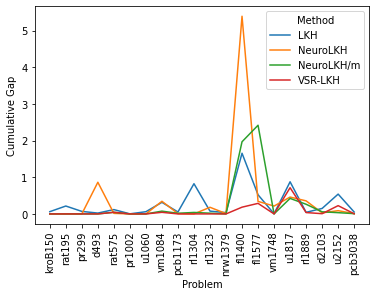

In [88]:

trials = df.sort_values(by=['Dimension','Method']) #.query("`Trials/TimeLimit`=='timelimit' and `Dimension`==200")
plt.xticks(rotation=90)
plt.ylabel('Cumulative Gap')
g_res = sns.lineplot(data=trials, x='Problem', y='cumGap', hue='Method', markers=True)


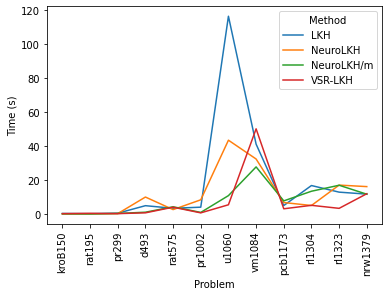

In [84]:
trials = df.query("`Dimension`<1400").sort_values(by=['Dimension','Method'])
plt.xticks(rotation=90)
plt.ylabel('Time (s)')
g_res = sns.lineplot(data=trials, x='Problem', y='Time', hue='Method' )

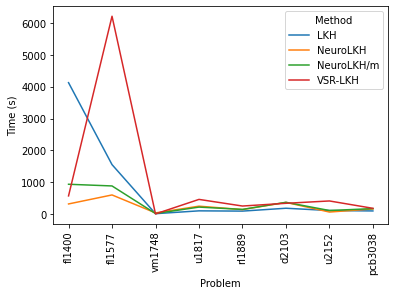

In [83]:
trials = df.query("`Dimension`>=1400").sort_values(by=['Dimension','Method'])
plt.xticks(rotation=90)
plt.ylabel('Time (s)')
g_res = sns.lineplot(data=trials, x='Problem', y='Time', hue='Method' )

In [80]:
grp_by = ['Problem','Dimension','Optimal']
grp_table = df.sort_values(by=['Dimension','Method']).groupby(by=grp_by)

df['Success'] = df['Successes'].astype(str) + '/10'
lst = ['Method', 'Best', 'Average', 'Success', 'Time', 'Trials_Avg']

print(r'\begin{center}\begin{tabular}{ '+ 'c ' * (len(lst) + 3) +'}')
print(r'\hline')
print(' & '.join([r'\textbf{' + i+ '}' for i in grp_by] + [i for i in lst]) + r' \\')
print(r'\hline')

#'\\\\\n'.join(['& ' * row +  
f_grp_cols = lambda col, row : '\\\n'.join(['& ' * row + str(i) for i in col])

for method, df_t in grp_table:
    #method, df_t = item
    df_lst = df_t.filter(lst)
    n_rows = df_lst.shape[0]
    #print('& ' * rows )
    #print(df_t['Method'].values)
    #print(df_lst)
    print(' & '.join([r'\multirow{'+str(n_rows)+r'}{*}{'+ str(method[idx]) +'}' for idx, i in enumerate(grp_by)]) + ' &')
    print(('& ' * (n_rows-1)).join([ ' & '.join(str(r) for r in row.values) + '\\\\\n' for i, row in  df_lst.iterrows()]))
    print(r'\hline')

print(r'\end{tabular}\end{center}')

\begin{center}\begin{tabular}{ c c c c c c c c c }
\hline
\textbf{Problem} & \textbf{Dimension} & \textbf{Optimal} & Method & Best & Average & Success & Time & Trials_Avg \\
\hline
['d2103', 2103, 80450]
\multirow{4}{*}{d2103} & \multirow{4}{*}{2103} & \multirow{4}{*}{80450} &
LKH & 80454 & 80462.0 & 0/10 & 186.53 & 2103.0\\
& & & NeuroLKH & 80450 & 80452.3 & 4/10 & 369.08 & 1617.2\\
& & & NeuroLKH/m & 80450 & 80454.6 & 3/10 & 372.9 & 1614.7\\
& & & VSR-LKH & 80450 & 80450.5 & 9/10 & 341.48 & 502.4\\

\hline
['d493', 493, 35002]
\multirow{4}{*}{d493} & \multirow{4}{*}{493} & \multirow{4}{*}{35002} &
LKH & 35002 & 35002.8 & 6/10 & 4.93 & 219.6\\
& & & NeuroLKH & 35002 & 35032.2 & 6/10 & 10.01 & 320.5\\
& & & NeuroLKH/m & 35002 & 35002.0 & 10/10 & 1.08 & 27.5\\
& & & VSR-LKH & 35002 & 35002.0 & 10/10 & 0.72 & 12.9\\

\hline
['fl1400', 1400, 20127]
\multirow{4}{*}{fl1400} & \multirow{4}{*}{1400} & \multirow{4}{*}{20127} &
LKH & 20127 & 20160.3 & 1/10 & 4124.32 & 1372.9\\
& & & NeuroLKH & 